##  Importing libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Reading the dataset

In [39]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv("https://raw.githubusercontent.com/Abhichat01/PRODIGY_DS_04/refs/heads/main/twitter_sentiment.csv",names=cols)

In [40]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [41]:
train.shape

(74682, 4)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [43]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [44]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [45]:
train.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,686


In [46]:
train[train.isnull().any(axis=1)]

,ID,Topic,Sentiment,Text
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [47]:
train.dropna(inplace=True)

In [48]:
train.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,0


## Checking for duplicate values

In [49]:
train.duplicated().sum()

2340

In [50]:
train[train.duplicated()]

,ID,Topic,Sentiment,Text
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
51,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
64,2411,Borderlands,Neutral,.. [
146,2425,Borderlands,Negative,"""What a bitch!"""
...,...,...,...,...
74505,9171,Nvidia,Neutral,This benchmarking comparison between Oculus Qu...
74510,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
74589,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74619,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


In [51]:
train[train.duplicated(keep=False)]

,ID,Topic,Sentiment,Text
18,2404,Borderlands,Positive,that was the first borderlands session in a lo...
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
48,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
...,...,...,...,...
74589,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74616,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74619,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74635,9193,Nvidia,Positive,Love EVERYTHING about it.


In [52]:
train.drop_duplicates(inplace=True)

In [53]:
train.duplicated().sum()

0

## Visualization of count of different topics

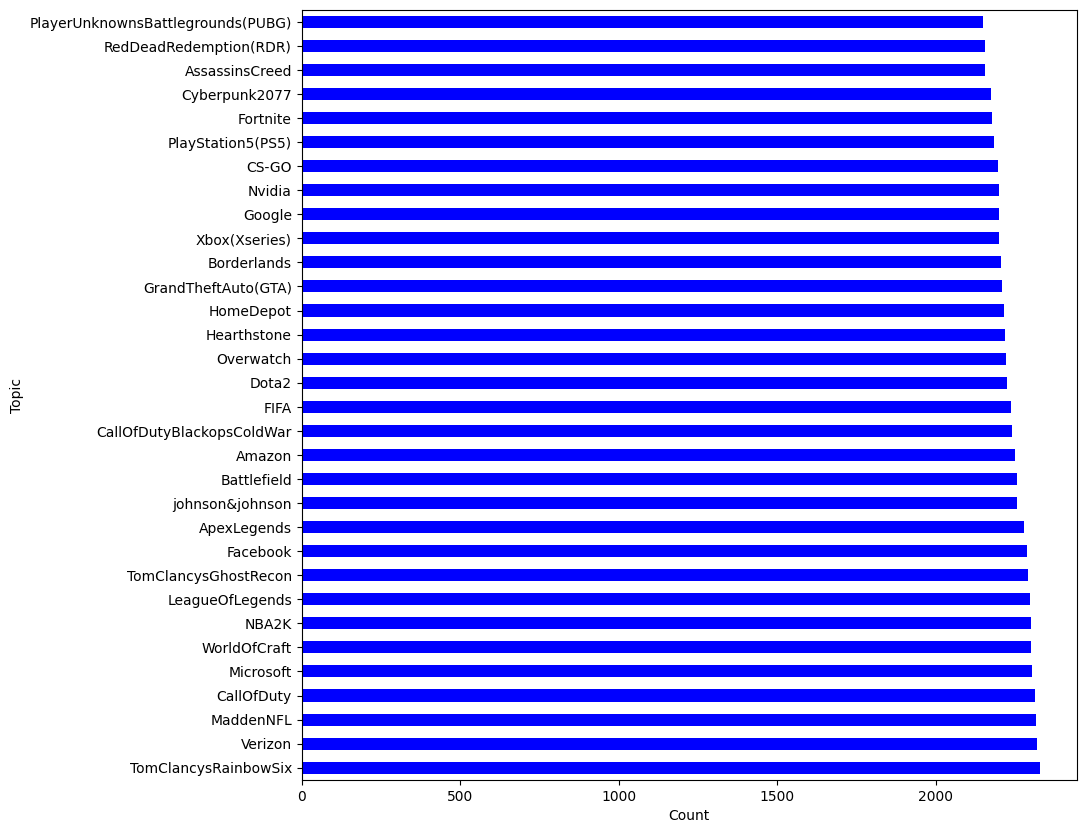

In [54]:
plt.figure(figsize=(10,10))
train['Topic'].value_counts().plot(kind='barh',color='b')
plt.xlabel("Count")
plt.show()

## Sentiment Distribution

<ipython-input-55-0f5f2096c1d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=train,palette='viridis')


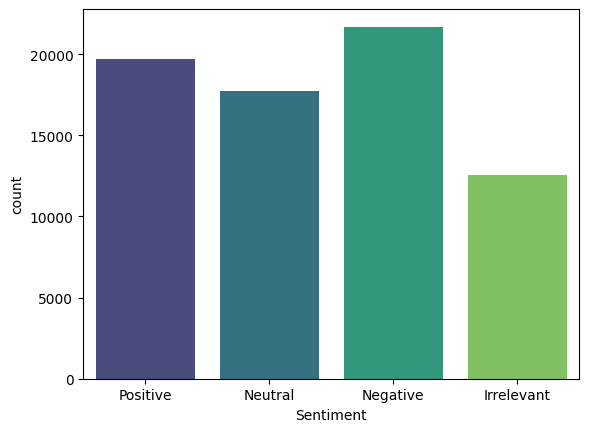

In [55]:
sns.countplot(x = 'Sentiment',data=train,palette='viridis')
plt.show()

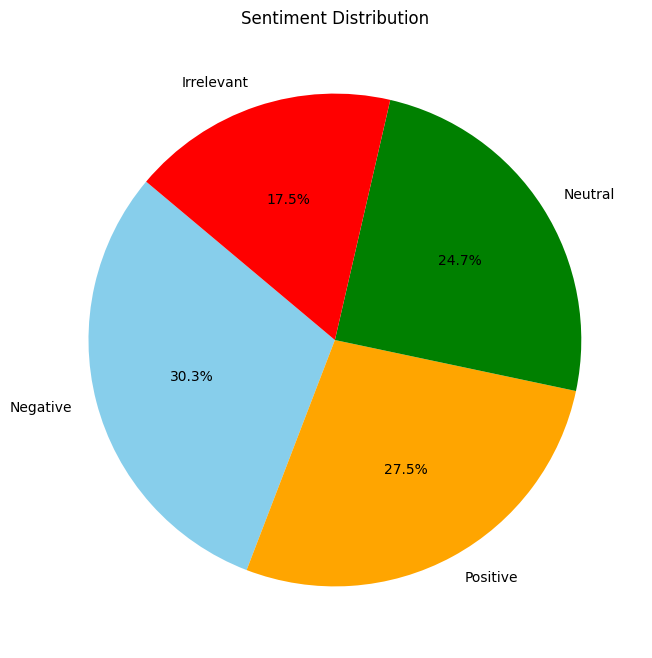

In [56]:
# Calculate the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

`Observation:`
- Most topic has negative sentiment

In [57]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## Sentiment Distribution Topic-wise

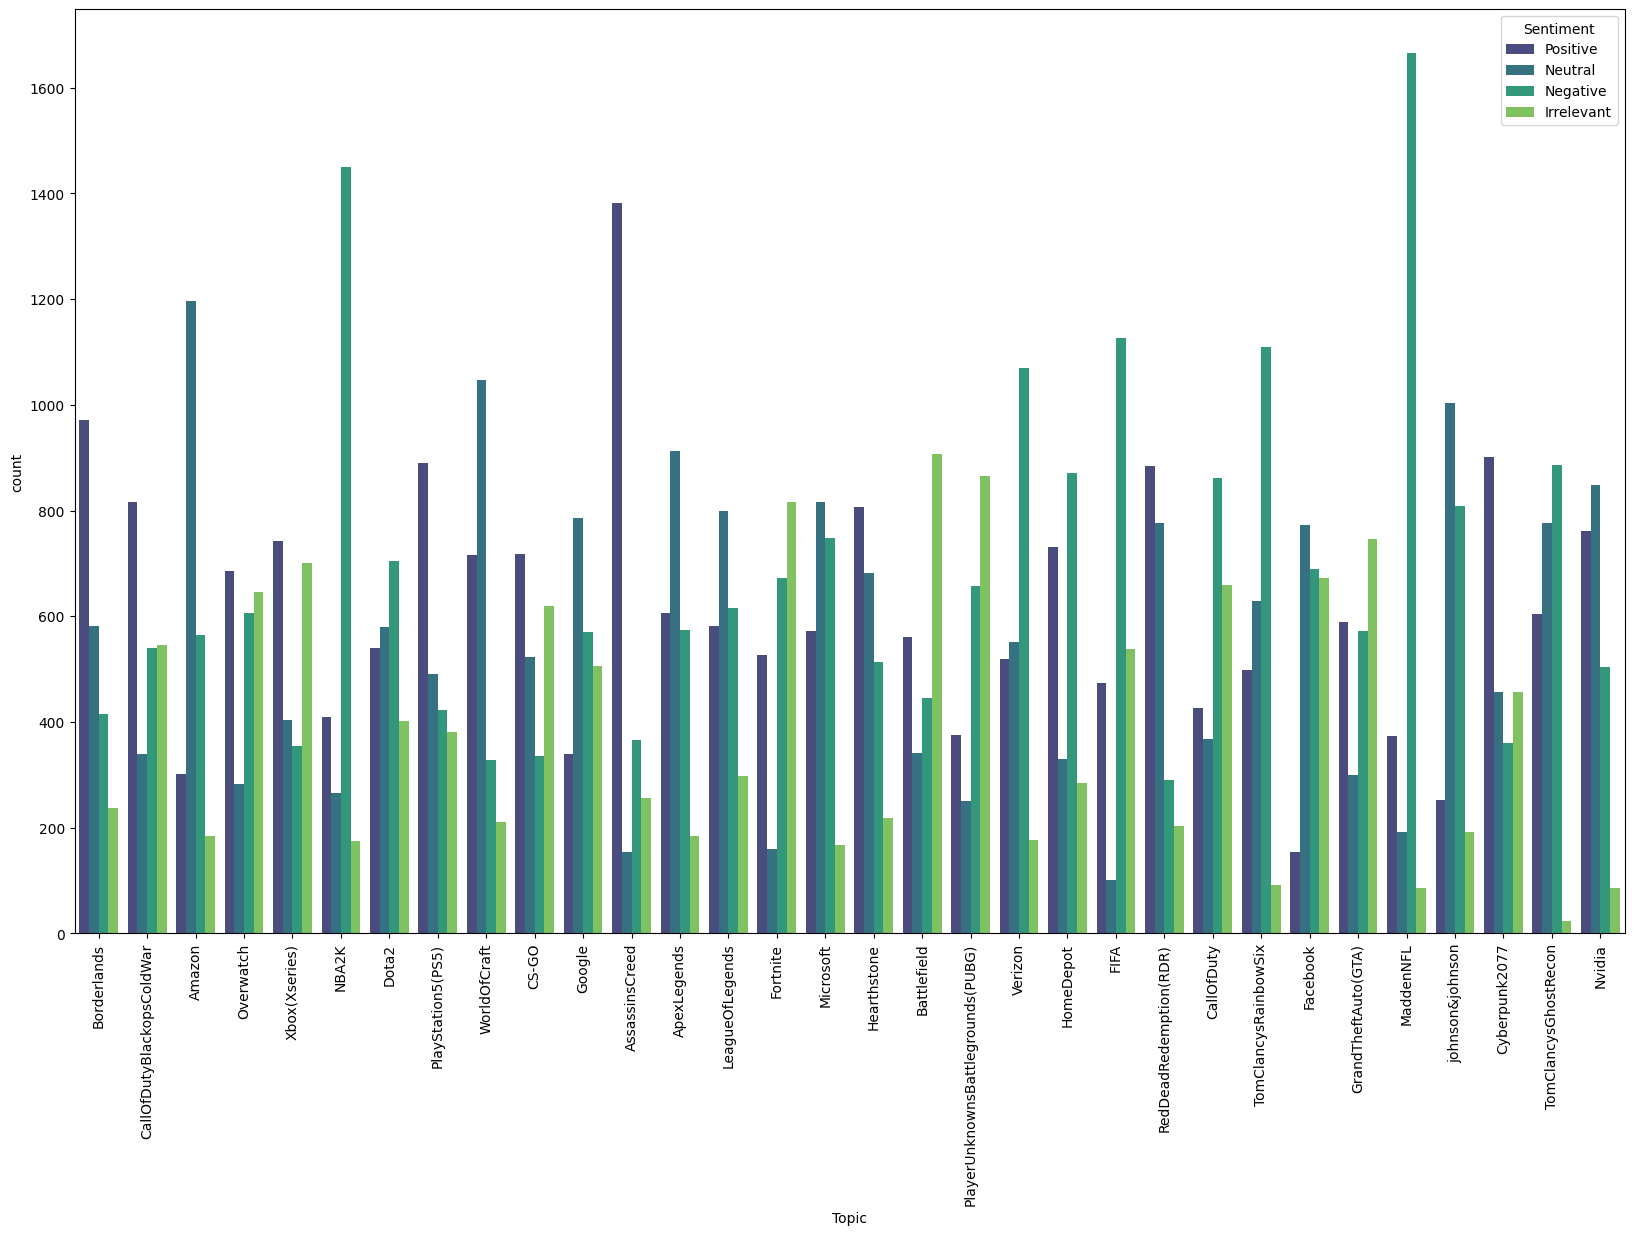

In [58]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [59]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

### Top 5 Topics with Negative Sentiments

<ipython-input-60-7127521535d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')


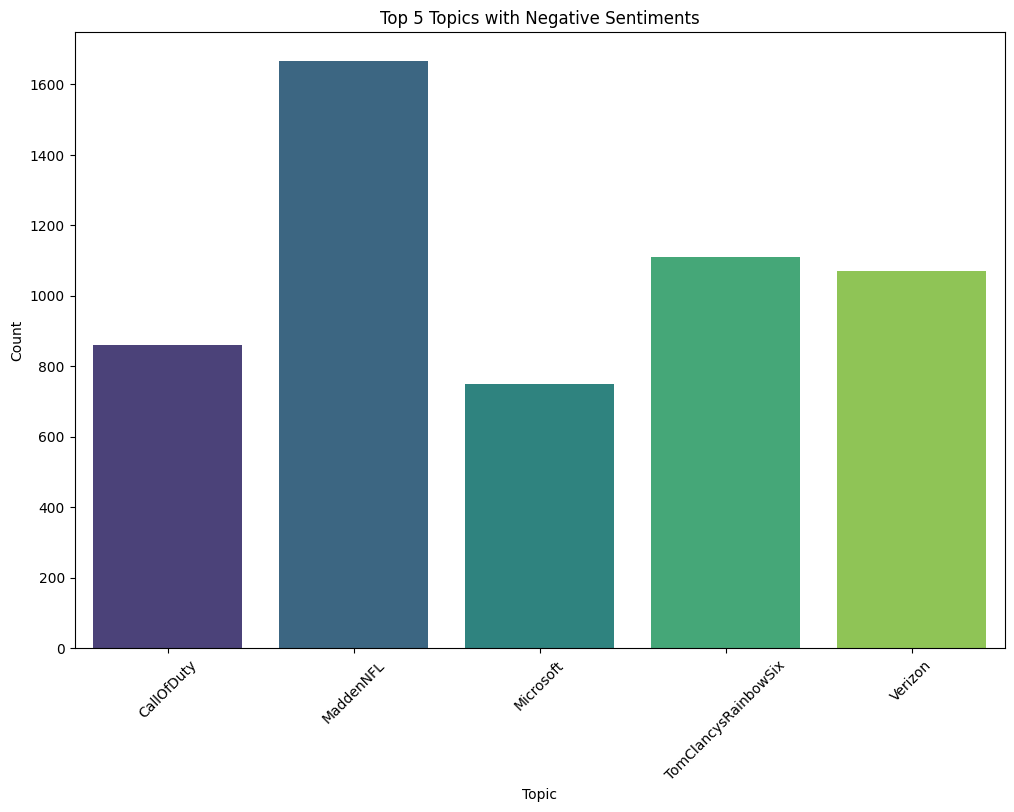

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Top 5 Topics with Positive Sentiments

<ipython-input-61-fa26222f4ed6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')


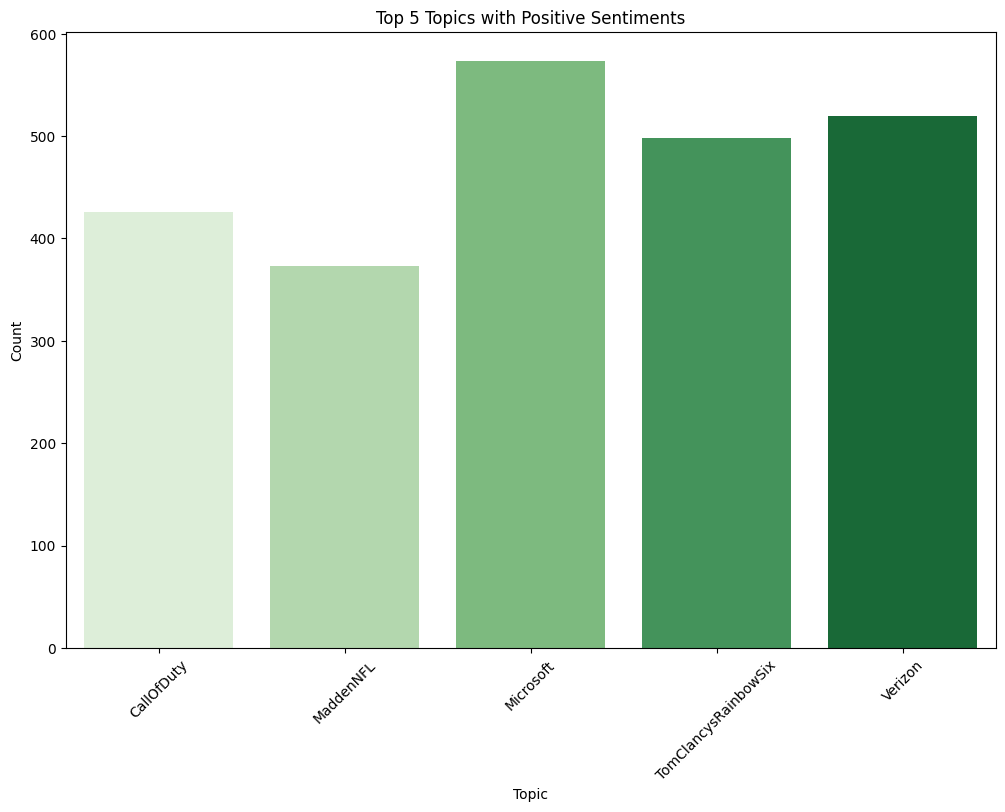

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Neutral Sentiments

<ipython-input-62-af01e1bcdbaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')


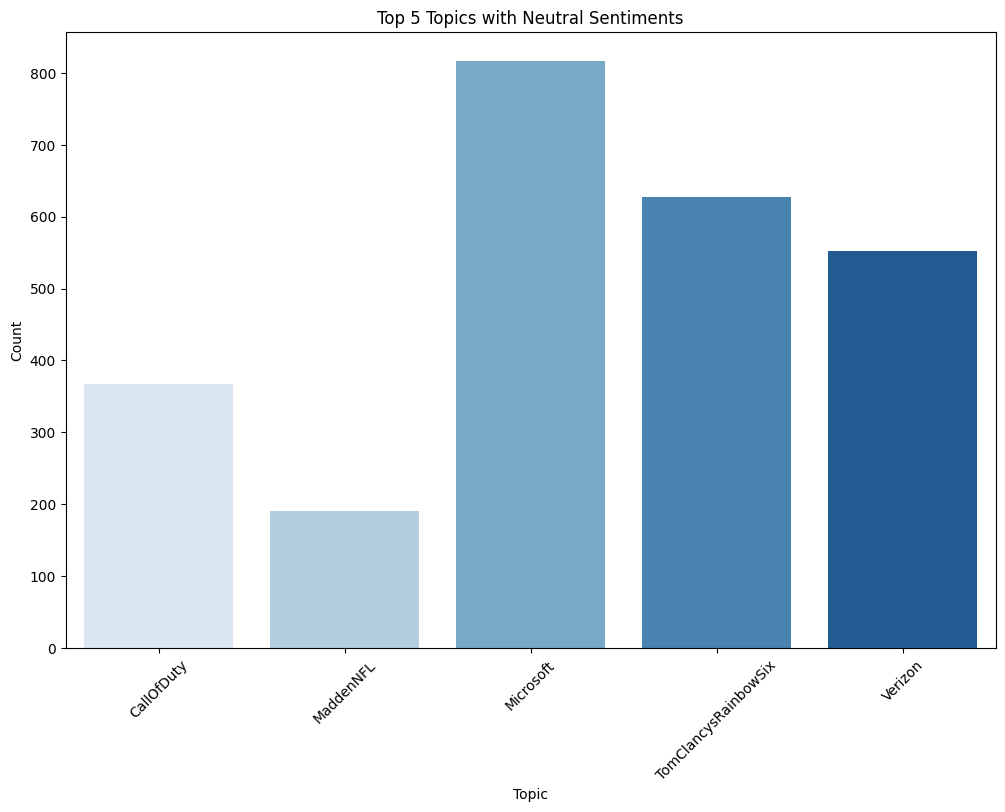

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Irrelevant Sentiments

<ipython-input-63-7662d01b7d35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')


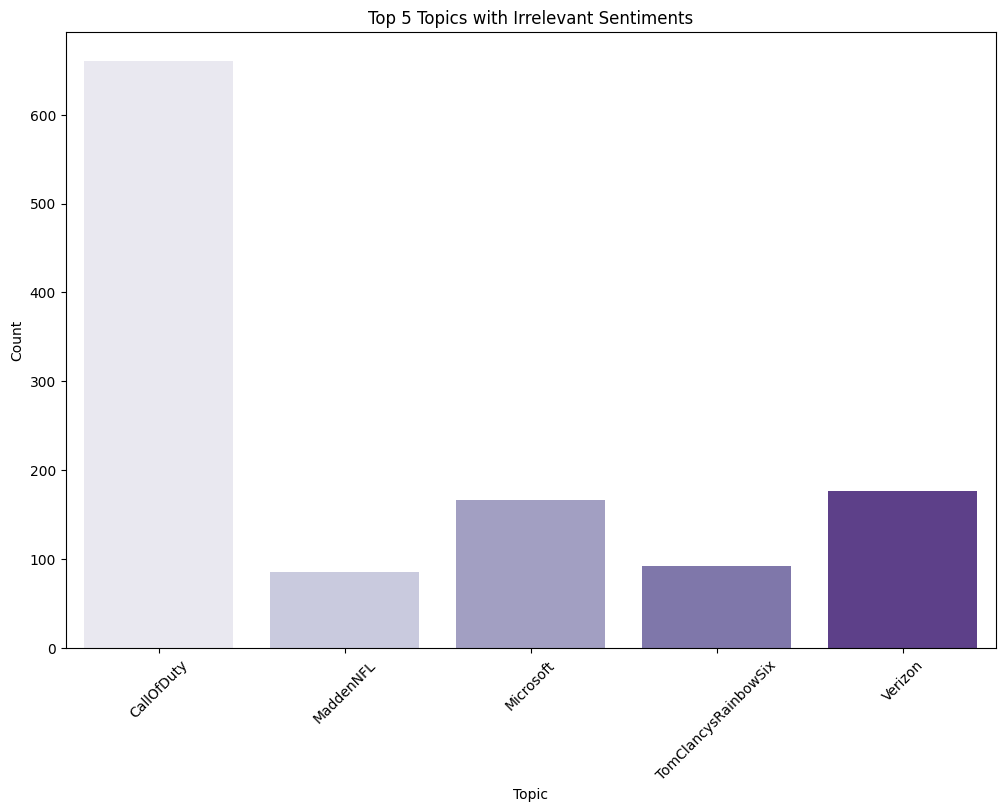

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Sentiment Distribution in Google

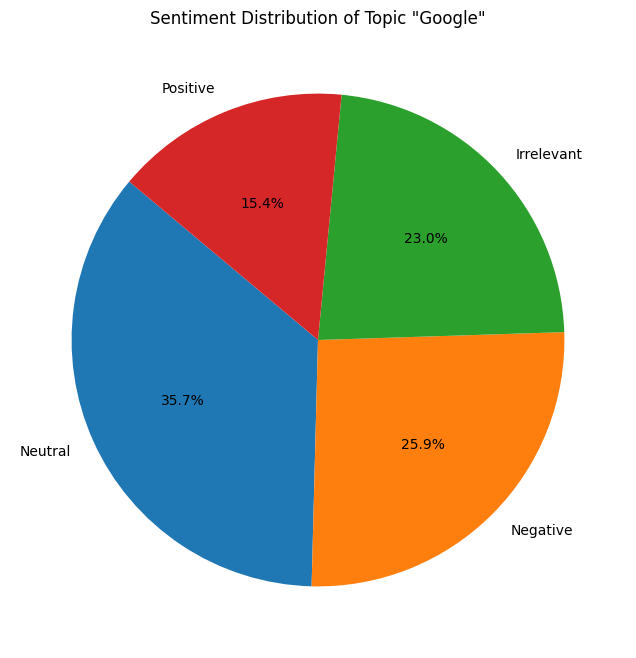

In [64]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()


## Sentiment Distribution in Microsoft

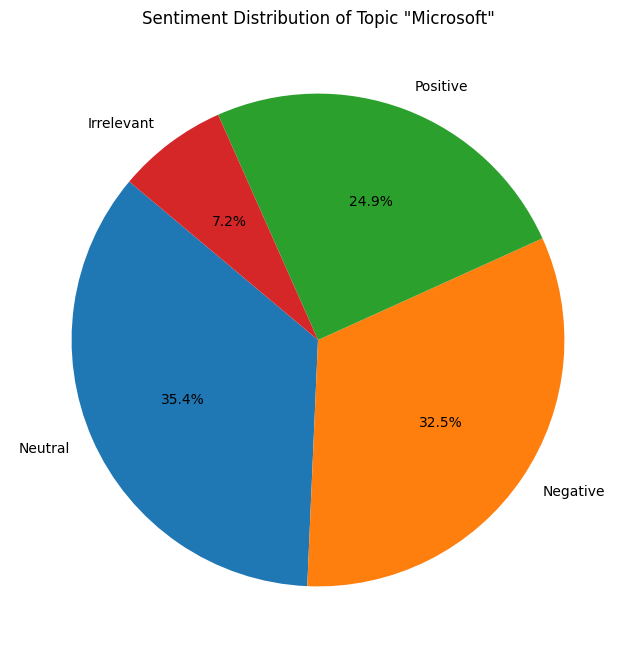

In [65]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [66]:
train['msg_len'] = train['Text'].apply(len)

In [67]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


## Plot of message length distribution for training data

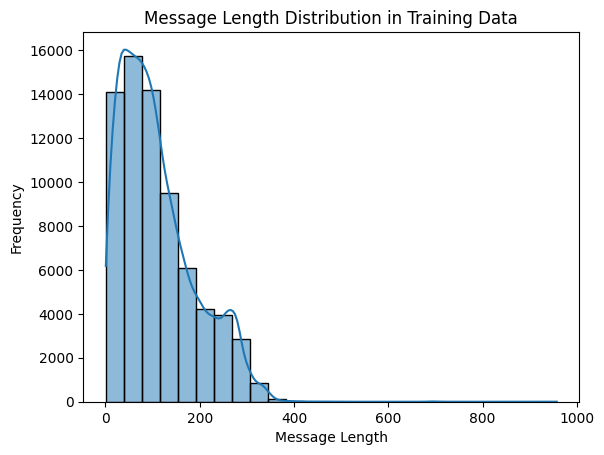

In [68]:
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

## Plot message length distribution by sentiment for training data

<ipython-input-69-ab60571ae2bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


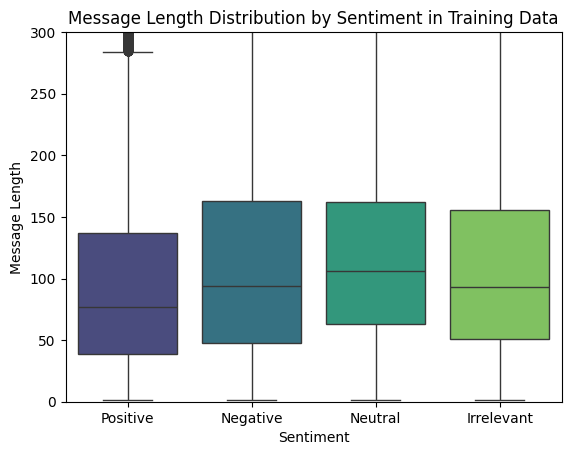

In [69]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

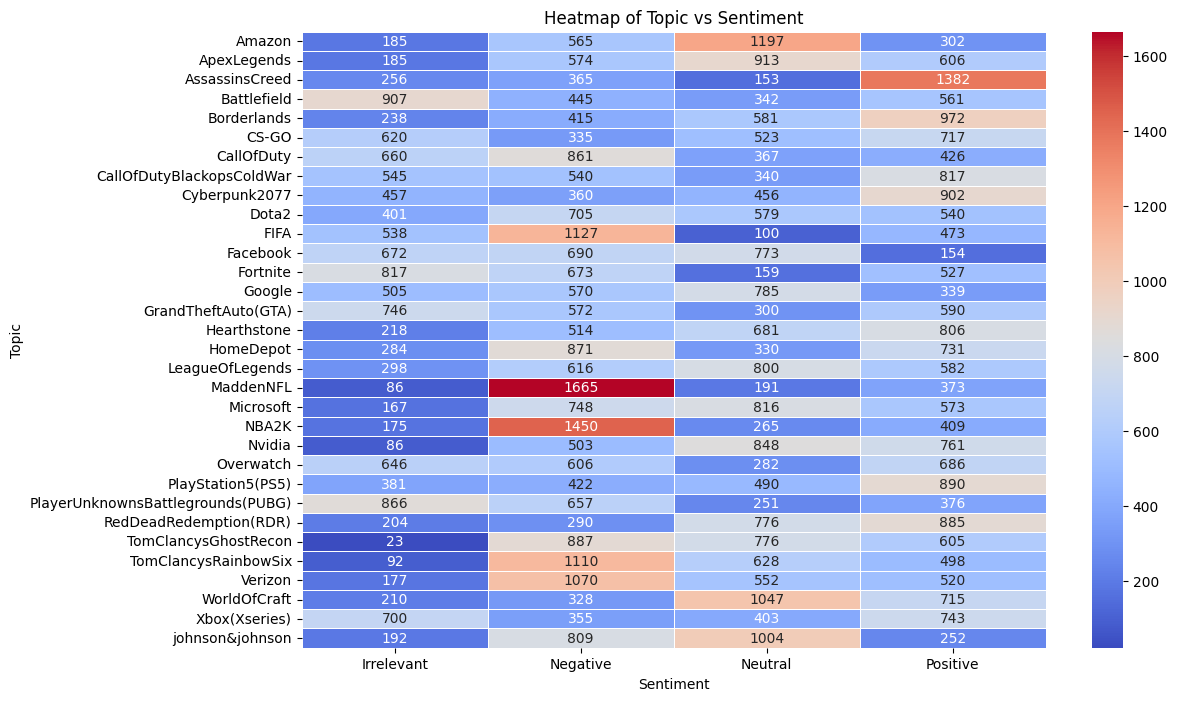

In [70]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()


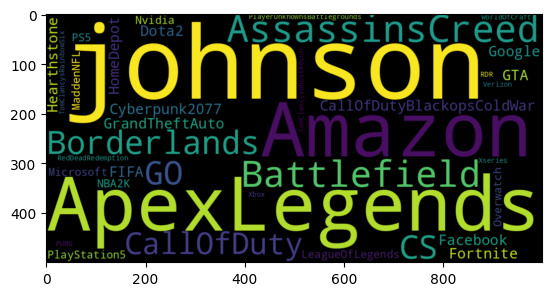

In [71]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

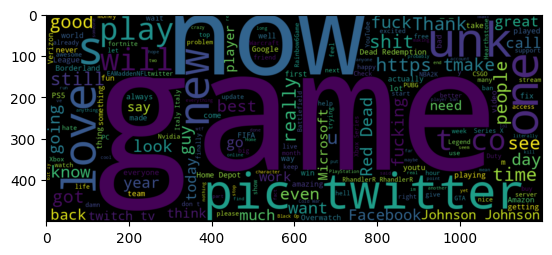

In [72]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')